In [374]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from datetime import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [375]:
warnings.filterwarnings('ignore')

In [376]:
data = pd.read_csv("/content/ICICIBANK.csv")
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,ICICIBANK,EQ,69.20,74.35,74.75,71.40,74.75,74.75,73.20,286260,2.095439e+12,NaN,NaN,NaN
1,2000-01-04,ICICIBANK,EQ,74.75,73.05,78.50,71.00,73.25,73.05,73.38,296264,2.173893e+12,NaN,NaN,NaN
2,2000-01-05,ICICIBANK,EQ,73.05,70.00,73.50,67.50,70.00,69.50,70.85,227624,1.612794e+12,NaN,NaN,NaN
3,2000-01-06,ICICIBANK,EQ,69.50,71.00,74.00,69.55,69.75,70.05,72.04,275149,1.982121e+12,NaN,NaN,NaN
4,2000-01-07,ICICIBANK,EQ,70.05,69.00,72.50,66.00,67.00,67.40,68.72,138809,9.538882e+11,NaN,NaN,NaN


In [377]:
data.drop(['Date'], axis=1, inplace=True)

In [378]:
print(data.head())
print(data.shape)
print(data.columns)

      Symbol Series  Prev Close   Open   High    Low   Last  Close   VWAP  \
0  ICICIBANK     EQ       69.20  74.35  74.75  71.40  74.75  74.75  73.20   
1  ICICIBANK     EQ       74.75  73.05  78.50  71.00  73.25  73.05  73.38   
2  ICICIBANK     EQ       73.05  70.00  73.50  67.50  70.00  69.50  70.85   
3  ICICIBANK     EQ       69.50  71.00  74.00  69.55  69.75  70.05  72.04   
4  ICICIBANK     EQ       70.05  69.00  72.50  66.00  67.00  67.40  68.72   

   Volume      Turnover  Trades  Deliverable Volume  %Deliverble  
0  286260  2.095439e+12     NaN                 NaN          NaN  
1  296264  2.173893e+12     NaN                 NaN          NaN  
2  227624  1.612794e+12     NaN                 NaN          NaN  
3  275149  1.982121e+12     NaN                 NaN          NaN  
4  138809  9.538882e+11     NaN                 NaN          NaN  
(5306, 14)
Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trade

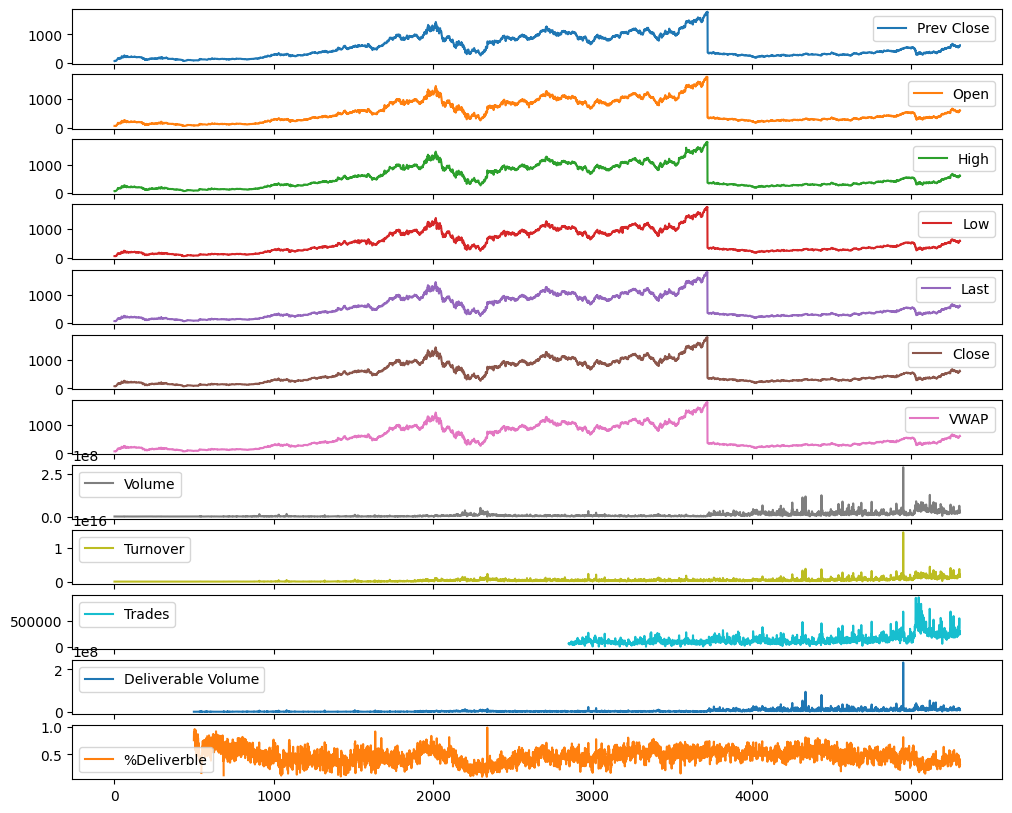

Symbol                   1
Series                   1
Prev Close            4546
Open                  3570
High                  3946
Low                   4048
Last                  4057
Close                 4546
VWAP                  5138
Volume                5303
Turnover              5306
Trades                2440
Deliverable Volume    4787
%Deliverble           3052
dtype: int64

In [379]:
data.plot(legend=True,subplots=True, figsize = (12, 10))
plt.show()
#data['Close'].plot(legend=True, figsize = (12, 6))
#plt.show()
#data['Volume'].plot(legend=True,figsize=(12,7))
#plt.show()

data.shape
data.size
data.describe(include='all').T
data.dtypes
data.nunique()


In [380]:
data.reset_index(drop=True, inplace=True)
#data.fillna(data.mean(), inplace=True)
data.head()


,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,ICICIBANK,EQ,69.20,74.35,74.75,71.40,74.75,74.75,73.20,286260,2.095439e+12,NaN,NaN,NaN
1,ICICIBANK,EQ,74.75,73.05,78.50,71.00,73.25,73.05,73.38,296264,2.173893e+12,NaN,NaN,NaN
2,ICICIBANK,EQ,73.05,70.00,73.50,67.50,70.00,69.50,70.85,227624,1.612794e+12,NaN,NaN,NaN
3,ICICIBANK,EQ,69.50,71.00,74.00,69.55,69.75,70.05,72.04,275149,1.982121e+12,NaN,NaN,NaN
4,ICICIBANK,EQ,70.05,69.00,72.50,66.00,67.00,67.40,68.72,138809,9.538882e+11,NaN,NaN,NaN


         Symbol Series  Prev Close    Open    High     Low    Last   Close  \
0     ICICIBANK     EQ       69.20   74.35   74.75   71.40   74.75   74.75   
1     ICICIBANK     EQ       74.75   73.05   78.50   71.00   73.25   73.05   
2     ICICIBANK     EQ       73.05   70.00   73.50   67.50   70.00   69.50   
3     ICICIBANK     EQ       69.50   71.00   74.00   69.55   69.75   70.05   
4     ICICIBANK     EQ       70.05   69.00   72.50   66.00   67.00   67.40   
...         ...    ...         ...     ...     ...     ...     ...     ...   
5301  ICICIBANK     EQ      569.95  602.00  605.50  588.00  588.70  591.10   
5302  ICICIBANK     EQ      591.10  593.25  601.95  591.10  599.00  598.75   
5303  ICICIBANK     EQ      598.75  598.00  622.80  598.00  619.70  621.35   
5304  ICICIBANK     EQ      621.35  622.55  628.45  609.00  621.00  621.45   
5305  ICICIBANK     EQ      621.45  610.10  616.35  598.10  599.70  600.50   

        VWAP    Volume      Turnover    Trades  Deliverable Vol

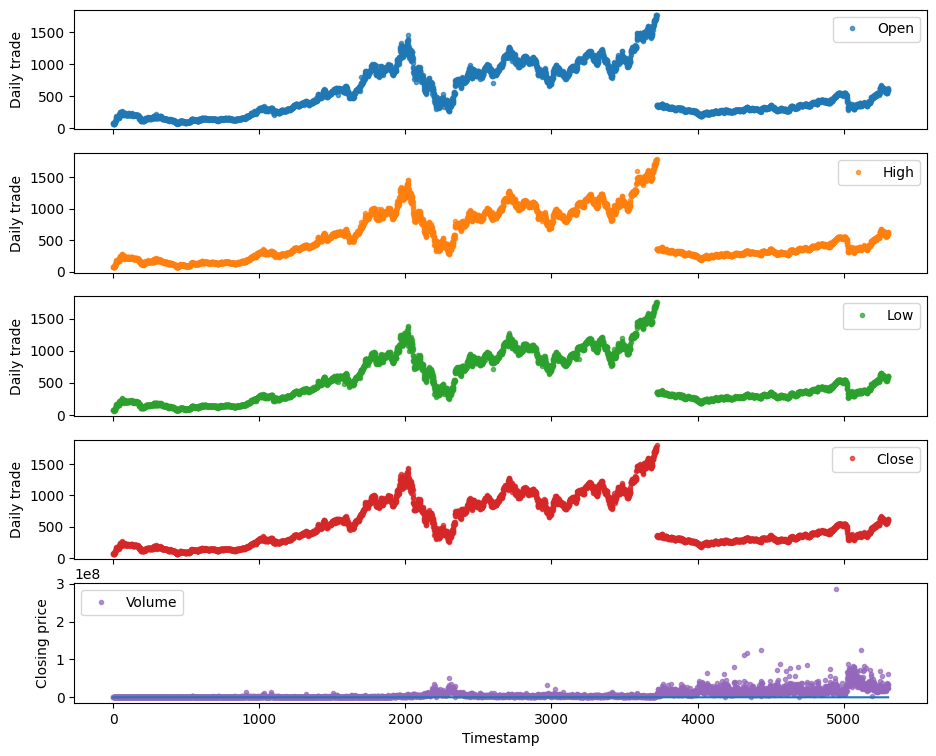

In [381]:

data.nunique()

data.sort_index(axis=1,ascending=True)

cols_plot = ['Open', 'High', 'Low','Close','Volume']
axes = data[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)



In [382]:
data.isnull().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     517
%Deliverble            517
dtype: int64

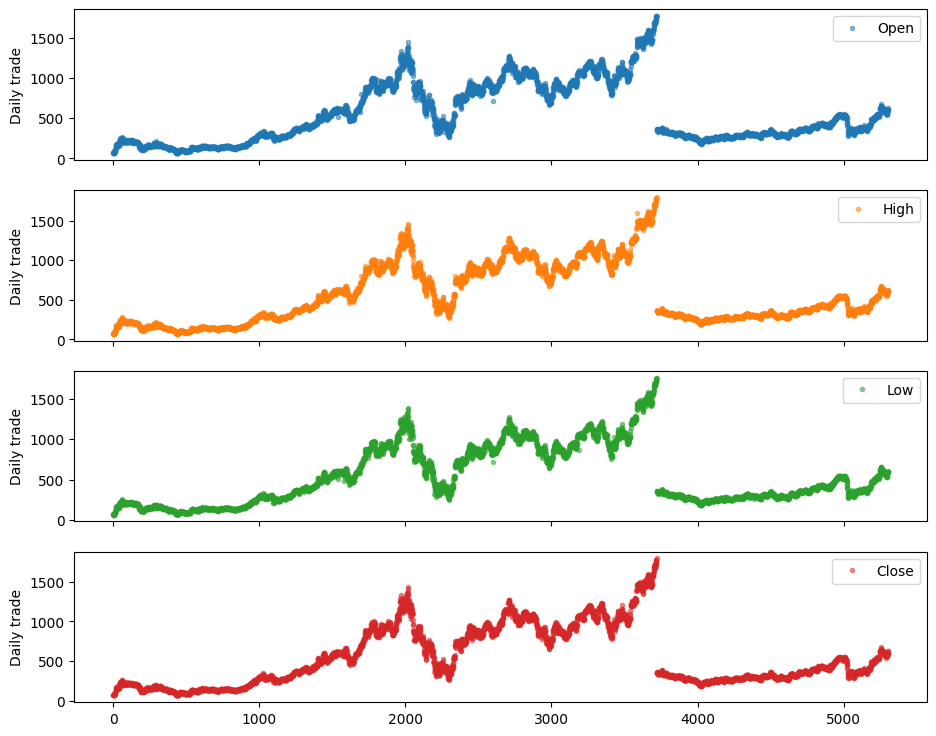

In [383]:
cols_plot = ['Open', 'High', 'Low','Close']
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

         Symbol Series  Prev Close    Open    High     Low    Last   Close  \
0     ICICIBANK     EQ       69.20   74.35   74.75   71.40   74.75   74.75   
1     ICICIBANK     EQ       74.75   73.05   78.50   71.00   73.25   73.05   
2     ICICIBANK     EQ       73.05   70.00   73.50   67.50   70.00   69.50   
3     ICICIBANK     EQ       69.50   71.00   74.00   69.55   69.75   70.05   
4     ICICIBANK     EQ       70.05   69.00   72.50   66.00   67.00   67.40   
...         ...    ...         ...     ...     ...     ...     ...     ...   
5301  ICICIBANK     EQ      569.95  602.00  605.50  588.00  588.70  591.10   
5302  ICICIBANK     EQ      591.10  593.25  601.95  591.10  599.00  598.75   
5303  ICICIBANK     EQ      598.75  598.00  622.80  598.00  619.70  621.35   
5304  ICICIBANK     EQ      621.35  622.55  628.45  609.00  621.00  621.45   
5305  ICICIBANK     EQ      621.45  610.10  616.35  598.10  599.70  600.50   

        VWAP    Volume      Turnover    Trades  Deliverable Vol

,count,mean,std,min,25%,50%,75%,max
Prev Close,5306.0,5.508954e+02,3.687841e+02,6.740000e+01,2.675625e+02,3.980750e+02,8.735625e+02,1.794100e+03
Open,5306.0,5.515585e+02,3.688910e+02,6.700000e+01,2.674000e+02,3.990000e+02,8.770000e+02,1.767050e+03
High,5306.0,5.605586e+02,3.740797e+02,7.045000e+01,2.719125e+02,4.065250e+02,8.887750e+02,1.798150e+03
Low,5306.0,5.415342e+02,3.633897e+02,6.600000e+01,2.636250e+02,3.924500e+02,8.598000e+02,1.760150e+03
Last,5306.0,5.510510e+02,3.687056e+02,6.700000e+01,2.674000e+02,3.987000e+02,8.746000e+02,1.793000e+03
Close,5306.0,5.509955e+02,3.687254e+02,6.740000e+01,2.676125e+02,3.981750e+02,8.735625e+02,1.794100e+03
VWAP,5306.0,5.511290e+02,3.687469e+02,6.852000e+01,2.675775e+02,3.982350e+02,8.735100e+02,1.783460e+03
Volume,5306.0,8.224631e+06,1.218535e+07,7.409000e+03,9.612055e+05,3.486648e+06,1.157202e+07,2.868577e+08
Turnover,5306.0,3.759336e+14,4.759238e+14,9.617283e+10,3.459444e+13,2.923010e+14,4.993528e+14,1.461959e+16
Trades,2456.0,1.383676e+05,9.900873e+04,2.595000e+03,7.931225e+04,1.101010e+05,1.629535e+05,9.498910e+05


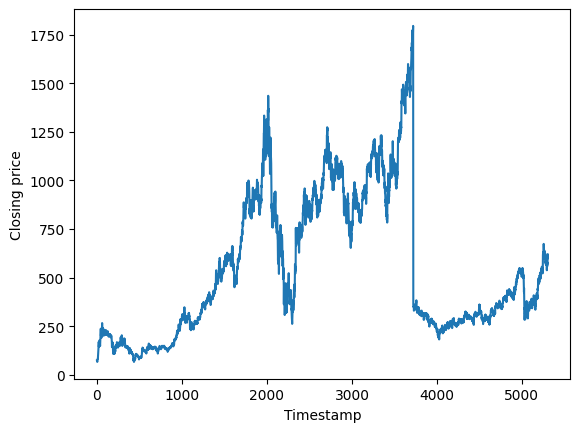

In [384]:
plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

df.describe().transpose()

In [385]:
from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=100
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 2] - first) / first)
    temp2.append((df.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

4163
1041


In [386]:
import keras
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten

#LSTM Model

lstm_1 = keras.layers.LSTM(16, activation='tanh', return_sequences=True, input_shape=(train_X.shape[1],100 ))

# Create the second LSTM layer
lstm_2 = keras.layers.LSTM(32, activation='tanh')


# Create the output layer
dense_layer = keras.layers.Dense(64, activation='relu')

# Stack the LSTM layers
model = keras.Sequential([lstm_1, lstm_2, dense_layer])



#DNN Model
model.add(Dense(64))
model.add(Activation('relu'))

###2nd layer
model.add(Dense(64))
model.add(Activation('relu'))

###3rd layer
model.add(Dense(64))
model.add(Activation('relu'))


model.add(Flatten())
#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])
history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=100,batch_size=64, verbose=1, shuffle =False)

Epoch 1/100
66/66 [==============================] - 4s 13ms/step - loss: 0.0341 - mse: 0.0341 - mae: 0.1137 - val_loss: 0.0052 - val_mse: 0.0052 - val_mae: 0.0533
Epoch 2/100
66/66 [==============================] - 0s 3ms/step - loss: 0.0051 - mse: 0.0051 - mae: 0.0488 - val_loss: 0.0033 - val_mse: 0.0033 - val_mae: 0.0427
Epoch 3/100
66/66 [==============================] - 0s 3ms/step - loss: 0.0037 - mse: 0.0037 - mae: 0.0414 - val_loss: 0.0026 - val_mse: 0.0026 - val_mae: 0.0383
Epoch 4/100
66/66 [==============================] - 0s 3ms/step - loss: 0.0032 - mse: 0.0032 - mae: 0.0387 - val_loss: 0.0025 - val_mse: 0.0025 - val_mae: 0.0371
Epoch 5/100
66/66 [==============================] - 0s 4ms/step - loss: 0.0029 - mse: 0.0029 - mae: 0.0371 - val_loss: 0.0025 - val_mse: 0.0025 - val_mae: 0.0383
Epoch 6/100
66/66 [==============================] - 0s 4ms/step - loss: 0.0028 - mse: 0.0028 - mae: 0.0362 - val_loss: 0.0027 - val_mse: 0.0027 - val_mae: 0.0401
Epoch 7/100
66/66 [==

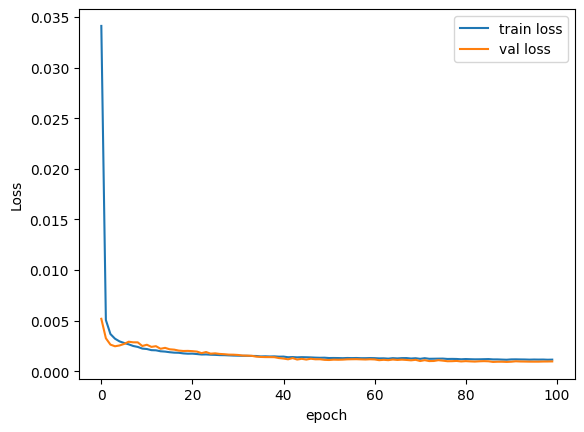

In [387]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

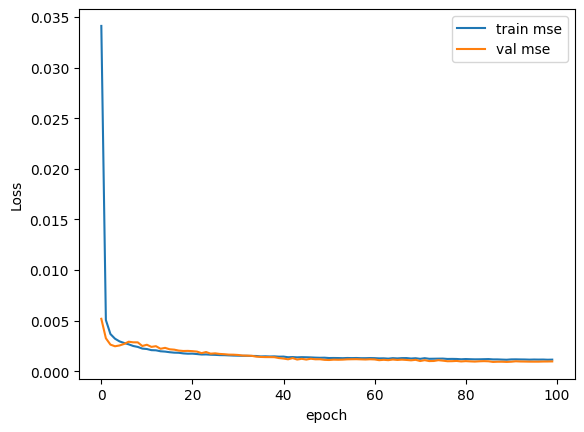

In [388]:
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

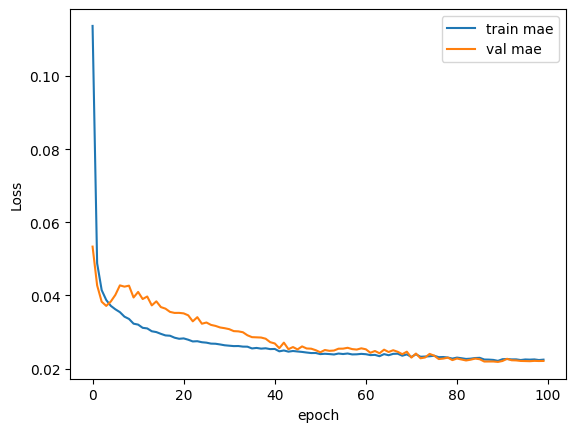

In [389]:
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_28 (LSTM)              (None, 1, 16)             7488      
                                                                 
 lstm_29 (LSTM)              (None, 32)                6272      
                                                                 
 dense_70 (Dense)            (None, 64)                2112      
                                                                 
 dense_71 (Dense)            (None, 64)                4160      
                                                                 
 activation_42 (Activation)  (None, 64)                0         
                                                                 
 dense_72 (Dense)            (None, 64)                4160      
                                                                 
 activation_43 (Activation)  (None, 64)              

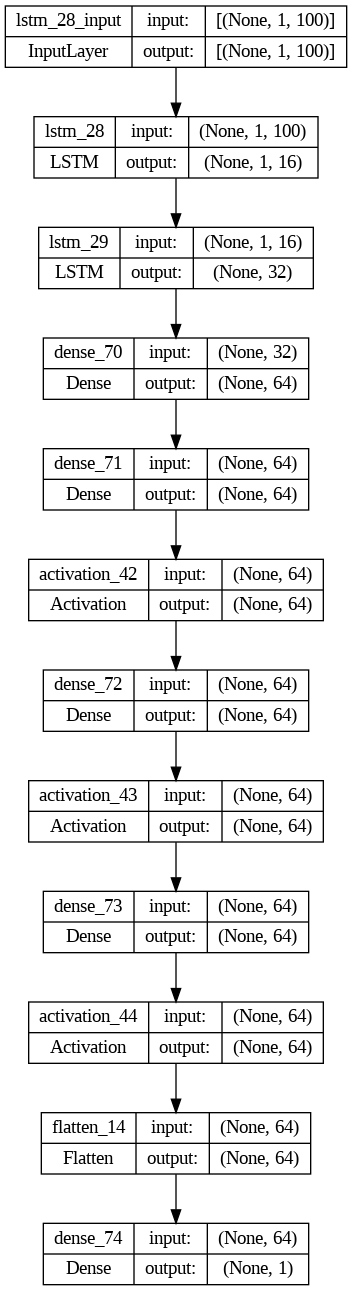

In [390]:
# After the model has been constructed, we'll summarise it
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

The Value used in Table for performance is from here

In [391]:
model.evaluate(test_X, test_Y)

33/33 [==============================] - 0s 2ms/step - loss: 9.6724e-04 - mse: 9.6724e-04 - mae: 0.0221


[0.0009672395535744727, 0.0009672395535744727, 0.022066717967391014]

In [392]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % r2)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.988532
R2 Score: 0.988494
Max Error: 0.187998


33/33 [==============================] - 0s 2ms/step


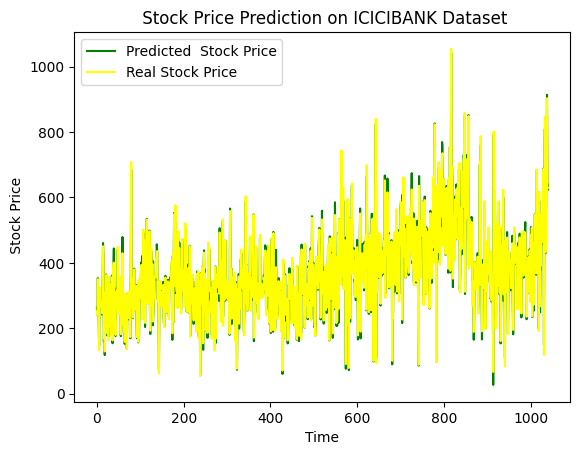

In [393]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'yellow', label = 'Real Stock Price')
plt.title(' Stock Price Prediction on ICICIBANK Dataset')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

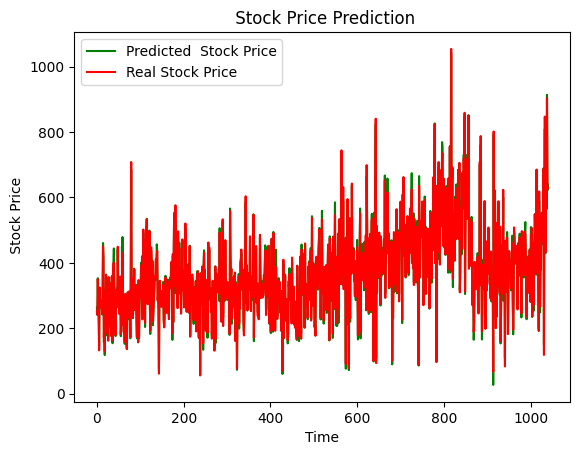

In [394]:
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [395]:
predicted

array([[263.08206],
       [241.16615],
       [353.1364 ],
       ...,
       [913.6722 ],
       [621.81946],
       [639.1245 ]], dtype=float32)

In [396]:
test_label

array([[251.01139601],
       [241.87692992],
       [350.37393046],
       ...,
       [903.44847651],
       [629.66154266],
       [629.22008368]])

In [397]:
# Flatten the arrays
predicted_flat = [val[0] for val in predicted]
test_label_flat = [val[0] for val in test_label]

# Create a DataFrame
res = pd.DataFrame({

    'Actual Price': test_label_flat,
    'Predicted Price': predicted_flat,
})

# Display the DataFrame
print(res)

      Actual Price  Predicted Price
0       251.011396       263.082062
1       241.876930       241.166153
2       350.373930       353.136414
3       267.227930       258.238129
4       248.049226       235.566956
...            ...              ...
1036    711.878746       691.813782
1037    564.526230       566.783997
1038    903.448477       913.672180
1039    629.661543       621.819458
1040    629.220084       639.124512

[1041 rows x 2 columns]


In [398]:
from tabulate import tabulate
table = tabulate(res, headers='keys', tablefmt='pretty')
print(table)

+------+--------------------+--------------------+
|      |    Actual Price    |  Predicted Price   |
+------+--------------------+--------------------+
|  0   | 251.01139601139602 | 263.0820617675781  |
|  1   | 241.87692991674078 | 241.16615295410156 |
|  2   | 350.37393045694523 | 353.13641357421875 |
|  3   | 267.22793006691126 | 258.2381286621094  |
|  4   | 248.04922600619196 | 235.56695556640625 |
|  5   | 132.79870428582382 | 145.92178344726562 |
|  6   | 325.4700556242275  | 318.3208312988281  |
|  7   | 275.7176470588235  | 278.0845642089844  |
|  8   | 274.37865842574075 | 276.07916259765625 |
|  9   | 276.13319383259915 | 262.47052001953125 |
|  10  | 263.3319633850178  | 265.5503845214844  |
|  11  | 284.81811111111114 | 280.3119812011719  |
|  12  | 245.89864864864865 |  242.143798828125  |
|  13  |  283.842022393282  | 287.8594970703125  |
|  14  | 450.66223585548744 | 460.7979736328125  |
|  15  | 412.8209327548807  |   419.2548828125   |
|  16  | 172.1140709013032  | 1

In [399]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_28 (LSTM)              (None, 1, 16)             7488      
                                                                 
 lstm_29 (LSTM)              (None, 32)                6272      
                                                                 
 dense_70 (Dense)            (None, 64)                2112      
                                                                 
 dense_71 (Dense)            (None, 64)                4160      
                                                                 
 activation_42 (Activation)  (None, 64)                0         
                                                                 
 dense_72 (Dense)            (None, 64)                4160      
                                                                 
 activation_43 (Activation)  (None, 64)              

In [400]:
#from sklearn.metrics import accuracy_score

#accuracy = accuracy_score(test_Y, yhat_probs)
#print('Accuracy: {:.2f}'.format(accuracy))